<a href="https://colab.research.google.com/github/HoganHBG/Data-visualization-w-Python/blob/master/Hogan_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style

In [ ]:
sbuxdata = pd.read_csv('https://github.com/HoganHBG/sbux/blob/master/us-starbucks-distant.csv?raw=true')

In [ ]:
sbuxdata.head()

,City,Name,Latitude,Longitude,Store Number,Street Combined,Postal Code,Country Subdivision,Country,Ownership Type,nearest_store_number,nearest_store_distance_km
0,Pittsfield,Carpenter Rd.,42.237164,-83.680870,13531-106377,3650 Carpenter Rd.,48104,MI,US,CO,18954-194328,0.2
1,Wilmette,1515 N. Sheridan - Wilmette,42.086498,-87.700333,224-119704,"1515 North Sheridan, Building 4",600911822,IL,US,CO,10453-101024,1.3
2,Sparks,S McCarran & E Greg St - Sparks,39.520657,-119.740723,10913-101634,"1560 S. Stanford Way, Suite A",894316331,NV,US,CO,75361-102358,2.1
3,Yuba City,Hwy 20 & Tharp - Yuba City,39.141994,-121.644569,14071-108147,"1615 Colusa Hwy, Ste 100, Sutter Buttes Market...",959939437,CA,US,CO,6586-188144,0.6
4,OFallon,Greenmount & I-64,38.573296,-89.930649,14263-116745,1126 Central Park Drive,622691769,IL,US,CO,76924-127273,4.7


In [ ]:
sbuxdata.tail()

,City,Name,Latitude,Longitude,Store Number,Street Combined,Postal Code,Country Subdivision,Country,Ownership Type,nearest_store_number,nearest_store_distance_km
12967,Yucaipa,Yucaips & 6th,34.034256,-117.060837,6438-245084,"33562-L Yucaipa Blvd, Yucaipa Valley Shopping ...",923992025,CA,US,CO,79654-108478,0.9
12968,Shorewood,METRO MARKET SHOREWOOD,43.090900,-87.887459,47408-254727,4075 N Oakland Ave,53211,WI,US,LS,9859-98421,0.3
12969,Renton,NE 4th Street and Union Ave NE,47.488873,-122.163139,29901-255125,4112 NE 4th Street,98059,WA,US,CO,3272-1807,0.6
12970,Long Beach,South Pike & Shoreline Drive,33.765556,-118.192665,27432-247557,95 South Pine Avenue,90802,CA,US,CO,75948-104482,0.2
12971,West Hollywood,Santa Monica & Robertson,34.084087,-118.385887,5232-248024,8949 Santa Monica Blvd.,900694912,CA,US,CO,3575-126987,0.1


In [ ]:
sbuxdata["State"] =sbuxdata["Country Subdivision"].str.replace(" ","_") 


In [ ]:
sbuxdata.head(20)

,City,Name,Latitude,Longitude,Store Number,Street Combined,Postal Code,Country Subdivision,Country,Ownership Type,nearest_store_number,nearest_store_distance_km,State
0,Pittsfield,Carpenter Rd.,42.237164,-83.680870,13531-106377,3650 Carpenter Rd.,48104,MI,US,CO,18954-194328,0.2,MI
1,Wilmette,1515 N. Sheridan - Wilmette,42.086498,-87.700333,224-119704,"1515 North Sheridan, Building 4",600911822,IL,US,CO,10453-101024,1.3,IL
2,Sparks,S McCarran & E Greg St - Sparks,39.520657,-119.740723,10913-101634,"1560 S. Stanford Way, Suite A",894316331,NV,US,CO,75361-102358,2.1,NV
3,Yuba City,Hwy 20 & Tharp - Yuba City,39.141994,-121.644569,14071-108147,"1615 Colusa Hwy, Ste 100, Sutter Buttes Market...",959939437,CA,US,CO,6586-188144,0.6,CA
4,OFallon,Greenmount & I-64,38.573296,-89.930649,14263-116745,1126 Central Park Drive,622691769,IL,US,CO,76924-127273,4.7,IL
5,Metairie,Veterans Blvd & Kingman St,30.004295,-90.180161,11875-105707,4312 Veterans Blvd.,70006,LA,US,CO,17959-186644,2.2,LA
6,San Luis Obispo,Higuera & Tank Farm,35.245502,-120.673286,14426-120264,3971 S. Higuera Street,934011580,CA,US,CO,15779-156022,1.5,CA
7,Wheat Ridge,"50th and Kipling-Wheatridge, CO",39.786865,-105.110107,13822-108298,4975 Kipling St,800332340,CO,US,CO,76471-97424,0.2,CO
8,Denver,Hampden & Dayton - Denver,39.653423,-104.872925,11034-104012,9925 East Hampden Ave,802314903,CO,US,CO,10114-93216,2.1,CO
9,Fort Wayne,Dupont & Auburn,41.178345,-85.113876,13343-106747,2132 East Dupont Road,468251584,IN,US,CO,22895-223904,1.8,IN


In [ ]:
sbuxdata.State.value_counts()

CA    2697
TX     985
WA     735
FL     669
NY     616
IL     544
CO     469
AZ     459
VA     422
OH     361
OR     352
PA     339
NC     319
GA     301
MI     270
MA     258
NJ     251
NV     245
MD     243
IN     211
MO     173
MN     172
TN     166
WI     138
SC     126
CT     115
KY     104
HI      97
KS      90
UT      89
DC      88
IA      83
AL      81
LA      79
NM      74
OK      73
ID      65
NE      54
AR      49
AK      48
MT      33
ME      32
MS      29
NH      27
RI      26
WV      25
DE      24
SD      23
WY      22
ND      13
VT       8
Name: State, dtype: int64

In [ ]:
import altair as alt


In [ ]:
sbuxdata_subset = sbuxdata.State.value_counts().reset_index()

In [ ]:
sbuxdata_subset.head()

,index,State
0,CA,2697
1,TX,985
2,WA,735
3,FL,669
4,NY,616


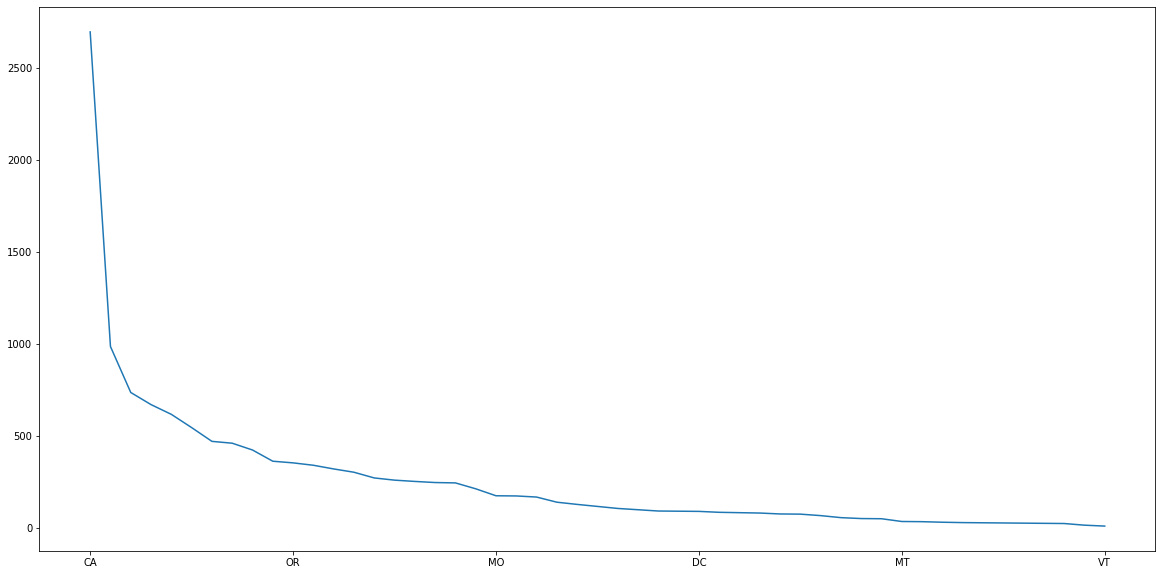

In [ ]:
sbuxdata_subset.plot(x='1', y='0', figsize=(20, 10))

In [ ]:
df= sbuxdata_subset.rename( columns={'index': 'State', 'State': 'Locations'}, inplace=True)


In [ ]:
sbuxdata_subset.head()

,State,Locations
0,CA,2697
1,TX,985
2,WA,735
3,FL,669
4,NY,616


In [ ]:
sbuxdata_subset.tail(10)

,State,Locations
41,ME,32
42,MS,29
43,NH,27
44,RI,26
45,WV,25
46,DE,24
47,SD,23
48,WY,22
49,ND,13
50,VT,8


In [ ]:
import folium
from folium import plugins

m = folium.Map([40.8136, -96.7026], zoom_start=5)
m


In [ ]:
sbuxdata_subset_lat_long = sbuxdata[['Latitude', 'Longitude']]
sbuxdata_subset_lat_long = sbuxdata_subset_lat_long.values
sbuxdata_subset_lat_long

array([[  42.23716354,  -83.68087006],
       [  42.08649826,  -87.70033264],
       [  39.52065659, -119.7407227 ],
       ...,
       [  47.48887253, -122.1631393 ],
       [  33.76555634, -118.1926651 ],
       [  34.08408737, -118.3858871 ]])

In [ ]:
m.add_child(plugins.HeatMap(sbuxdata_subset_lat_long))
m
m.add_child(aline)
m.add_child(bline)

In [ ]:
#San Anselmo, Tampa coordinates
coordinates=[(37.99746, -122.5616),(40.7608, -111.88910),(41.1400, -104.8202),(40.8674, -97.5921), (32.7767, -96.7970), (32.5252, -93.7502), (30.4213, -87.2169), (30.266940, -82.755072), (27.9506, -82.4572)]

m = folium.Map(location=[40.8136, -96.7026], zoom_start=5)

#line going from San Anselmo to Tampa
aline=folium.PolyLine(locations=coordinates,weight=2,color = 'blue')
m.add_child(aline)

In [ ]:
#San Anselmo, Tampa coordinates
coordinates=[(37.99746, -122.5616),(40.7608, -111.88910),(41.1400, -104.8202),(40.8674, -97.5921), (32.7767, -96.7970), (32.5252, -93.7502), (30.4213, -87.2169), (30.266940, -82.755072), (27.9506, -82.4572)]

m = folium.Map(location=[40.8136, -96.7026], zoom_start=5)

#line going from San Anselmo to Tampa
aline=folium.PolyLine(locations=coordinates,weight=2,color = 'blue')
m.add_child(aline)

#Tampa to San Anselmo, coordinates
coordinates2=[(27.9506, -82.4572), (30.266940, -82.755072), (30.4213, -87.2169), (30.2121247,-92.1086089), (29.7604, -95.3698), (29.4241, -98.4936), (31.7619, -106.4850),(32.2226, -110.9747),(33.4457, -112.0740), (34.0522, -118.2437),  (37.99746, -122.5616)]

m = folium.Map(location=[40.8136, -96.7026], zoom_start=5)

#line going from Tampa to San Anselmo
bline=folium.PolyLine(locations=coordinates2,weight=2,color = 'red')
aline=folium.PolyLine(locations=coordinates,weight=2,color = 'blue')
m.add_child(aline)
m.add_child(bline)